In [24]:
install.packages("arules")
install.packages("arulesViz")
library(arules)
library(arulesViz)
df <- read.csv("/content/merged_restaurants_census.csv", stringsAsFactors = FALSE)
print("Original Data:")
print(head(df, 5))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Original Data:"
                         Title             Category Rating
1    Dairy Queen Grill & Chill Fast food restaurant    3.8
2            Jake's Restaurant  American restaurant    4.4
3                Carib Kitchen Caribbean restaurant    4.9
4 Cazadores Mexican Restaurant   Mexican restaurant    4.5
5      La Posada Mexican Grill   Mexican restaurant    4.3
                                                                                 Address
1        Dairy Queen Grill & Chill, 3143 US-280, Alexander City, AL 35010, United States
2                Jake's Restaurant, 16 Broad St, Alexander City, AL 35010, United States
3                    Carib Kitchen, 68 Broad St, Alexander City, AL 35010, United States
4 Cazadores Mexican Restaurant, 910 Cherokee Rd, Alexander City, AL 35010, United States
5          La Posada Mexican Grill, 3714 US-280, Alexander City, AL 35010, United States
                                           Categories  ZCTA        NAME
1          ['Fast f

In [25]:
# Convert 'Categories' column from string format to a clean list of character vectors
df$Categories <- lapply(df$Categories, function(x) {
  x <- gsub("\\[|\\]", "", x)  # Remove square brackets
  x <- gsub("'", "", x)        # Remove single quotes
  x <- strsplit(x, ",\\s*")[[1]]  # Split by comma and possible spaces and extract as vector
})

# Convert list to transactions format
transactions_list <- as(df$Categories, "list")
transactions <- as(transactions_list, "transactions")

# Print first five transactions correctly
print("First five transactions:")
inspect(head(transactions, 5))
cat("\n")

# Save transactions to CSV
transactions_df <- data.frame(Transactions = sapply(df$Categories, paste, collapse = ","))
write.csv(transactions_df, "transactions_data.csv", row.names = FALSE)
print("Transactions data saved successfully to 'transactions_data.csv'")

# Apply Apriori algorithm
min_support <- 0.005  # Adjust as needed
frequent_itemsets <- apriori(transactions, parameter = list(support = min_support, target = "frequent itemsets"))

# Generate association rules
rules <- apriori(transactions, parameter = list(supp = min_support, conf = 0.1, target = "rules"))

# Extract top rules based on different metrics
top_support <- head(sort(rules, by = "support", decreasing = TRUE), 15)
top_confidence <- head(sort(rules, by = "confidence", decreasing = TRUE), 15)
top_lift <- head(sort(rules, by = "lift", decreasing = TRUE), 15)

# Print extracted rules
print("Top 15 Rules by Support:")
inspect(top_support)
cat("\n")
print("Top 15 Rules by Confidence:")
inspect(top_confidence)
cat("\n")
print("Top 15 Rules by Lift:")
inspect(top_lift)
cat("\n")

[1] "First five transactions:"
    items                                          
[1] {Fast food restaurant, Ice cream shop}         
[2] {American restaurant}                          
[3] {Caribbean restaurant}                         
[4] {Mexican restaurant}                           
[5] {Latin American restaurant, Mexican restaurant}

[1] "Transactions data saved successfully to 'transactions_data.csv'"
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 678 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1161 item(s), 135735 transaction(s)] done [0.09s].
sorting and recoding items ... [74 item(s)] done [0.01s].
creating transa

Warning message in apriori(transactions, parameter = list(support = min_support, :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.01s].
sorting transactions ... done [0.03s].
writing ... [1415 set(s)] done [0.00s].
creating S4 object  ... done [0.01s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 678 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1161 item(s), 135735 transaction(s)] done [0.08s].
sorting and recoding items ... [74 item(s)] done [0.01s].
creating transaction tree ... done [0.05s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(transactions, parameter = list(supp = min_support, conf = 0.1, :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.01s].
writing ... [5842 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
[1] "Top 15 Rules by Support:"
     lhs                       rhs                    support    confidence
[1]  {}                     => {Restaurant}           0.40061885 0.4006189 
[2]  {}                     => {Fast food restaurant} 0.14299186 0.1429919 
[3]  {}                     => {American restaurant}  0.14014808 0.1401481 
[4]  {}                     => {Mexican restaurant}   0.10989060 0.1098906 
[5]  {Fast food restaurant} => {Restaurant}           0.07233212 0.5058478 
[6]  {Restaurant}           => {Fast food restaurant} 0.07233212 0.1805510 
[7]  {American restaurant}  => {Restaurant}           0.06654142 0.4747937 
[8]  {Restaurant}           => {American restaurant}  0.06654142 0.1660966 
[9]  {Bar}                  => {Restaurant}           0.05431171 0.5635655 
[10] {Restaurant}           => {Bar}                  0.05431171 0.1355695 
[11] {Takeout restaurant}   => {Restaur

[1] "Network graph for top lift rules"


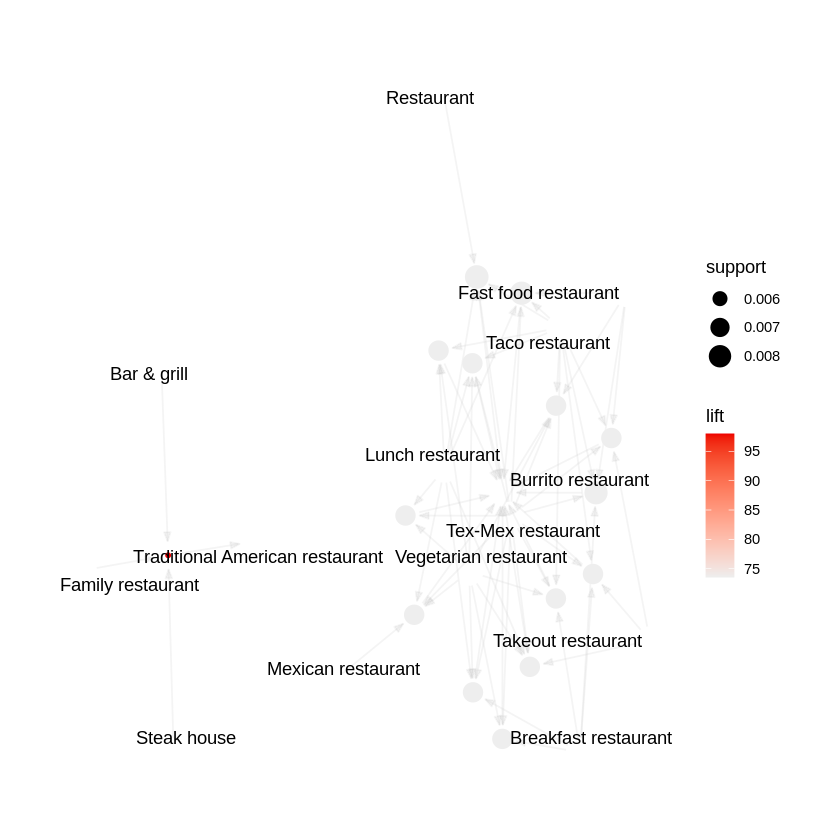

In [31]:
# Visualization: Network Graph for Top Lift Rules
print("Network graph for top lift rules")

plot(
  top_lift,
  method = "graph",
  control = list(layout = "stress")
)